In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 
from control.matlab import * 
import os 
from scipy import signal, io 
from scipy.linalg import fractional_matrix_power 

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

In [3]:
testSys_mat = io.loadmat("DATA/testSys_ABCD.mat")
A = testSys_mat['A']
B = testSys_mat['B']
C = testSys_mat['C']
D = testSys_mat['D']

sysFull = ss(A,B,C,D,1)
r=10 # Reduced order model 

In [4]:
def controllability_matrix(A, B):
    """
    Compute the controllability matrix of the system (A, B)
    """
    n = A.shape[0]
    ctrb_matrix = B
    for i in range(1, n):
        ctrb_matrix = np.hstack((ctrb_matrix, np.linalg.matrix_power(A, i) @ B))
    return ctrb_matrix

def observability_matrix(A, C):
    """
    Compute the observability matrix of the system (A, C)
    """
    n = A.shape[0]
    obsv_matrix = C
    for i in range(1, n):
        obsv_matrix = np.vstack((obsv_matrix, C @ np.linalg.matrix_power(A, i)))
    return obsv_matrix

In [5]:
# Compute controllability and observability matrices
ctrb_matrix = controllability_matrix(A, B)
obsv_matrix = observability_matrix(A, C)

In [6]:
Henkel_matrix = obsv_matrix@ctrb_matrix

In [7]:
U,S,Vt = np.linalg.svd(Henkel_matrix,full_matrices=True)

In [8]:
# Now we truncate
U_tr = U[:,0:r]
S_tr = S[0:r]
Vt_tr =Vt[:,0:r]

In [9]:
# direct modes 
Psi = ctrb_matrix@Vt_tr@np.diag(S_tr**(-1/2)) 
# Adjoint modes
Sig = obsv_matrix.T@U_tr@np.diag(S_tr**(-1/2)) 


In [10]:
# New balanced model 
A_b = Sig.T@A@Psi 
B_b = Sig.T@B 
C_b = C@Psi 
D_b = D

In [11]:
sysBPOD = ss(A_b,B_b,C_b,D_b)

In [12]:
## Plot impulse responses for all methods
yout_full,tout_full = impulse(sysFull,np.arange(0,60,1))
yout_BPOD,tout_BPOD = impulse(sysBPOD,np.arange(0,60,1))


c:\Users\ccandelo\Documents\PYTHON\Repositories\.venv\Lib\site-packages\control\timeresp.py:1975: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


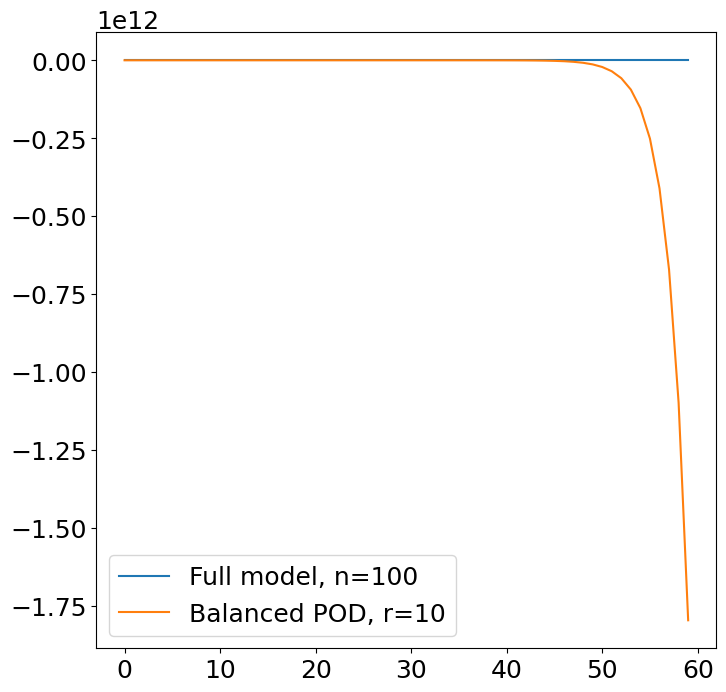

In [13]:

plt.plot(tout_full,yout_full.reshape(60,2)[:,0],label='Full model, n=100')
plt.plot(tout_BPOD,yout_BPOD.reshape(60,2)[:,0],label='Balanced POD, r=10')
plt.legend()
plt.show()

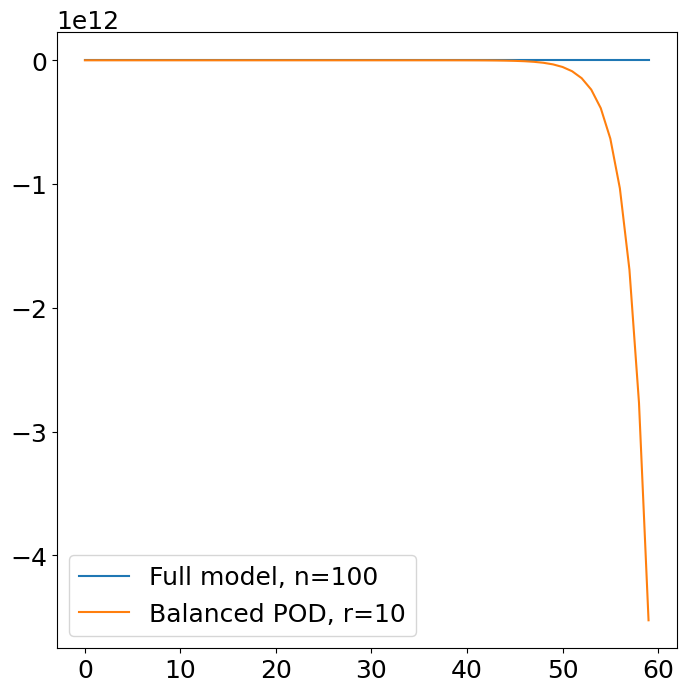

In [15]:
plt.plot(tout_full,yout_full.reshape(60,2)[:,1],label='Full model, n=100')
plt.plot(tout_BPOD,yout_BPOD.reshape(60,2)[:,1],label='Balanced POD, r=10')
plt.legend()
plt.show()

In [14]:
yout_BPOD.shape

(60, 2, 1)